# Machine Learning: Session 2

## Regression, regularization and cross-validation

In this task you will experiment with linear regression and see what happens when we use regularized versions of it. More precisely, you will try out Ridge and Lasso regularization. In addition, we will see how using cross-validation helps us to get more stable estimates for our performance.

Read in the data in **data.csv** and split it into training (50%) and testing (50%) set. Use random seed 0 (train_test_split method).

In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



CRED = '\033[91m'
CEND = '\033[0m'

data = pd.read_csv("data.csv", index_col = 0)


In [2]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [3]:
X = data.drop('y', axis=1)  # Drop the 'y' column to get features
y = data['y']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


In [4]:
##### YOUR CODE ENDS ##### (please do not delete this line)

## Task 1. Multivariate linear regression (1 point)

#### <font color='purple'>(a) Implement the fitting procedure of non-regularized multivariate ordinary least squares linear regression, as presented in the lecture slides (matrix operations). Fit on the training data and save the coefficients and the intercept for use in subtask (1c). Print out the coefficients corresponding to the five first features.

In [5]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [6]:
## we want to achieve w= (XT.X)^-1 . (XT.Y)
# Calculate X_train^T * X_train
X_train_with_intercept = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_train_transpose_X_train = np.dot(X_train_with_intercept.T, X_train_with_intercept)
# Calculate the inverse of X_train_transpose_X_train
X_train_transpose_X_train_inverse = np.linalg.inv(X_train_transpose_X_train)
X_train_transpose_y_train = np.dot(X_train_with_intercept.T, y_train)

first_five_my_ols_coefficients = np.dot(X_train_transpose_X_train_inverse, X_train_transpose_y_train)


In [7]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [8]:
print('Coefficients of five first features according to my OLS implementation:', first_five_my_ols_coefficients[1:6])


Coefficients of five first features according to my OLS implementation: [11.85875833  7.7562925   9.63087962  6.99932448  4.99498325]


#### <font color='purple'>(b) Call out the `sklearn.linear_model.LinearRegression` learning algorithm from the sklearn package. Fit the model on the training data and save it for use in the following subtasks. Print out the coefficients corresponding to the five first features.

In [9]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
linear_intercept=model.intercept_
first_five_sklearn_ols_coefficients = model.coef_


In [11]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [12]:
print('Coefficients of five first features according to sklearn OLS implementation:', first_five_sklearn_ols_coefficients[:5])


Coefficients of five first features according to sklearn OLS implementation: [11.85875833  7.7562925   9.63087962  6.99932448  4.99498325]


#### <font color='purple'>(c) Demonstrate that the methods of subtasks (1a) and (1b) give the same results by showing that they find the same coefficients and intercept. </font>

You maybe won't get exactly the same results because of precision problems of floats so the idea is to compare if the values are equal up to some precision (e.g. check if the difference is less than 0.000001). If for some reason you are not able to get the assertions to pass with the given precision then please change the precision such that the assertions would pass.

In [13]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("Please assign intercepts and coefficients to the given variables.")
    my_intercept = first_five_my_ols_coefficients[0]
    my_coefficients =first_five_my_ols_coefficients[0:]
    sklearn_intercept = linear_intercept
    sklearn_coefficients = model.coef_
    precision = 0.000001
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    assert(abs(my_intercept - sklearn_intercept) < precision)
    for i in range(99):
       assert(abs(my_coefficients[i+1] - sklearn_coefficients[i]) < precision)
    print('The assertions have passed with precision:',precision)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

The assertions have passed with precision: 1e-06


#### <font color='purple'>(d) Using the sklearn model from subtask (1b) predict the results on the training and testing set and calculate and show the root mean square errors (RMSE). Since you need to do the same evaluation in future tasks also, please implement a function 'evaluate' for this.

In [14]:
def evaluate(regression_model_class_instance, trainX, trainY, testX, testY):
    print("\n#################\n")
    print(regression_model_class_instance, '\n')
    
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("Implement RMSE for train and test sets.")
    train_predictions = regression_model_class_instance.predict(trainX)
    test_predictions = regression_model_class_instance.predict(testX)
    rmse_tr = np.sqrt(mean_squared_error(trainY, train_predictions))
    rmse_te = np.sqrt(mean_squared_error(testY, test_predictions))
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    print("RMSE train:", rmse_tr)
    print("RMSE test:", rmse_te)
    
    return rmse_tr, rmse_te

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    evaluate(model,X_train,y_train,X_test,y_test)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)


#################

LinearRegression() 

RMSE train: 2.51279852074029e-14
RMSE test: 7.715131133027525


## Task 2. Ridge & Lambda regularized regression  (1 point)

This blogpost might clarify regularization a bit: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

Intuition behind the regularization: https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

#### <font color='purple'>(a) Implement the fitting procedure of ridge regression, as presented in the lecture slides (matrix operations). Fit on the training data with regularization parameter equal to 1 and save the coefficients and the intercept for use in subtask (2c). Print out the coefficients corresponding to the five first features.

In [15]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [16]:
# Calculate X_train^T * X_train

identity_matrix = np.eye(X_train_transpose_X_train.shape[0])
lambda_value = 1
# Calculate the inverse of X_train_transpose_X_train
X_train_transpose_X_train_plus_lambda_inverse = np.linalg.inv(X_train_transpose_X_train + lambda_value*identity_matrix)


first_five_my_ridge_coefficients = np.dot(X_train_transpose_X_train_plus_lambda_inverse,X_train_transpose_y_train )

In [17]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [18]:
print('Coefficients of five first features according to my ridge implementation:', first_five_my_ridge_coefficients[1:6])

Coefficients of five first features according to my ridge implementation: [7.91026896 7.37023604 6.97156822 6.03240044 4.42825097]


#### <font color='purple'>(b) Call out the `sklearn.linear_model.Ridge` learning algorithm from the sklearn package. Fit the model on the training data with regularization parameter equal to 1 and save it for use in the following subtasks. Print out the coefficients corresponding to the five first features.</font>

Use parameters `solver = "cholesky", tol = 0.000000000001` in order to get more similar results to your own implementation. The default parameter for the regularization is already 1 so no need to specify that. The parameters `solver` and `tol` are necessary to force sklearn to use closed-form solution. Otherwise it would use numerical optimization which would give more different results from yours. **In the future tasks, please use the default option and don't force it to use the closed-form solution (numerical will be faster!).**

In [19]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [20]:
from sklearn.linear_model import Ridge
ridge_model= Ridge(solver="cholesky",tol=0.000000000001)
ridge_model.fit(X_train,y_train)
first_five_sklearn_ridge_coefficients = ridge_model.coef_

In [21]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [22]:
print('Coefficients of five first features according to my ridge implementation:', first_five_sklearn_ridge_coefficients[:5])


Coefficients of five first features according to my ridge implementation: [7.9028966  7.36974365 6.97110025 6.02447226 4.4245448 ]


#### <font color='purple'>(c) Demonstrate the correctess of your implementation the same way as in the previous exercise. For this compare your coefficients and intercept as obtained in subtask (2a) with the coeffiecients and intercept from sklearn, as obtained in subtask (2b). The results can actually vary quite a bit due to implementation differences in matrix operations. Compare that the differences in results (coefficients and intercept) are less than 0.02. If for some reason you are not able to get the assertions to pass with the given precision then please change the precision such that the assertions would pass.

In [23]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("Please assign intercepts and coefficients to the given variables.")
    my_ridge_intercept = first_five_my_ridge_coefficients[0]
    my_ridge_coefficients = first_five_my_ridge_coefficients[1:]
    sklearn_ridge_intercept = ridge_model.intercept_
    sklearn_ridge_coefficients = first_five_sklearn_ridge_coefficients
    precision = 0.02
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    assert(abs(my_ridge_intercept - sklearn_ridge_intercept) < precision)
    for i in range(99):
        assert(abs(my_ridge_coefficients[i] - sklearn_ridge_coefficients[i]) < precision)
    print('The assertions have passed with precision:',precision)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

The assertions have passed with precision: 0.02


#### <font color='purple'>(d) Train a Lasso model using the sklearn package (use the default regularization parameter) and save it for future use. Print out the coefficients corresponding to the five first features.</font>

In [24]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [25]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
first_five_sklearn_lasso_coefficients = lasso_model.coef_

In [26]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [27]:
print('Coefficients of five first features according to sklearn lasso implementation:', first_five_sklearn_lasso_coefficients[:5])

Coefficients of five first features according to sklearn lasso implementation: [6.94577472 5.59046803 5.11228019 3.00075122 2.42991249]


#### <font color='purple'>(e) Evaluate the sklearn Ridge and Lasso models on the training and testing set and calculate and show the RMSE, using the function 'evaluate' from subtask (1d).

In [28]:
try:
    print('Evaluation of sklearn ridge regression model:')
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    evaluate(ridge_model, X_train, y_train, X_test, y_test)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    
    print('Evaluation of sklearn lasso regression model:')
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    evaluate(lasso_model, X_train, y_train, X_test, y_test)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

Evaluation of sklearn ridge regression model:

#################

Ridge(solver='cholesky', tol=1e-12) 

RMSE train: 0.5159376269540175
RMSE test: 4.446220364755533
Evaluation of sklearn lasso regression model:

#################

Lasso() 

RMSE train: 4.984130516628729
RMSE test: 5.400343154987264


## Task 3. Choosing a suitable regularization parameter  (1 point)

Since different parameters can lead to very different results we need to do some parameter tuning and find a suitable regularization parameter for both Ridge and Lasso. We could try out different values and see which ones lead to the best results on the test set. However, then we would overfit to our test data and we would not have an adequate estimate of how good the model is in the end. That is why we need to do parameter tuning only using the training set.

Use **alphas = np.linspace(0.01, 10, 100)** for Ridge and **alphas = np.linspace(0.01, 5, 100)** for Lasso. The method generates 100 values with equal steps between the first and second parameter.

#### <font color='purple'>(a) **Method 1:** Divide the training set into training and validation set using 90%/10% split and a random seed 0 (train_test_split method). Train Ridge and Lasso models with different alpha values on the training set and calculate the RMSE values on the validation set. Choose and report the alpha that has the best RMSE for Ridge and another alpha that has the best RMSE for Lasso (save both alpha and RMSE values).

In [29]:
def method_1(model,alphas,random_seed):
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("Calculate RMSE for Ridge and Lasso models.")
    X_1=data.drop(['y'],axis=1)
    y_1=data.y
    X_train_1, X_test_1, y_train_1,y_test_1 = train_test_split(X_1,y_1,test_size=0.5,random_state=random_seed)           
    
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_1, y_train_1, test_size=0.10, random_state=random_seed)
    best_rmse = float('inf')
    best_alpha = None
    for alpha in alphas:
        model.alpha=alpha
        model.fit(X_train_split, y_train_split)
        predictions = model.predict(X_val_split)
        rmse = np.sqrt(mean_squared_error(y_val_split, predictions))

        # Update the best alpha and RMSE if needed
        if rmse < best_rmse:
            best_rmse = rmse
            best_alpha = alpha



    ##### YOUR CODE ENDS ##### (please do not delete this line)
    return best_alpha,best_rmse

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    alphas_ridge = np.linspace(0.01, 10, 100)
    alphas_lasso = np.linspace(0.01, 5, 100)
    ridge_1=Ridge()
    lasso_1=Lasso()
    print(method_1(ridge_1, alphas_ridge,0)) ## ridge
    print(method_1(lasso_1, alphas_lasso,0))## lasso
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

(0.21181818181818182, 3.6195061947357083)
(0.06040404040404041, 0.6865670399948167)


#### <font color='purple'>(b) **Method 2:** Instead of doing only one training/validation split, use 10-fold cross validation. For each alpha value calculate the validation errors for each of the folds and average the results. Then choose and report the alpha that has the best RMSE for Ridge and another alpha that has best RMSE for Lasso (save both alpha and RMSE values). For doing the 10-fold split use the sklearn method KFold (kf = KFold(n_splits=10, random_state = 0, shuffle = True)). To see more about how to iterate through the folds see the documentation for the method.

In [30]:
from sklearn.model_selection import KFold

def method_2(model,alphas,random_seed):
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("Implement 10-fold cross-validation.") 
            
    X_2=data.drop(['y'],axis=1)
    y_2=data.y
    X_train_2, X_test_2, y_train_2,y_test_2 = train_test_split(X_2,y_2,test_size=0.5,random_state=random_seed) 
    X_train_values = X_train_2.values if isinstance(X_train_2, pd.DataFrame) else X_train_2
    y_train_values = y_train_2.values if isinstance(y_train_2, pd.Series) else y_train_2
    kf = KFold(n_splits=10, random_state=random_seed, shuffle=True)

    avg_rmse = []


    for alpha in alphas:
        rmse_per_fold = []
        for train_index, val_index in kf.split(X_train_values):
            
            X_train_fold, X_val_fold = X_train_values[train_index], X_train_values[val_index]
            y_train_fold, y_val_fold = y_train_values[train_index], y_train_values[val_index]
            model.alpha=alpha    
            model.fit(X_train_fold, y_train_fold)
            predictions = model.predict(X_val_fold)

            rmse_per_fold.append(np.sqrt(mean_squared_error(y_val_fold, predictions)))
        avg_rmse.append(np.mean(rmse_per_fold))
     
    best_alpha= alphas[np.argmin(avg_rmse)]
    best_rmse = np.min(avg_rmse)        
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    return best_alpha,best_rmse
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
 
    print(method_2(ridge_1, alphas_ridge, 0)) ## ridge
    print(method_2(lasso_1, alphas_lasso, 0)) ## lasso
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

(0.21181818181818182, 3.8648319981338255)
(0.06040404040404041, 0.7472838567224851)


## Task 4. Comparing the stability of Method 1 and Method 2  (1 point)

#### <font color='purple'>(a) Run Method 1 and Method 2 both 10 times, every time using a different value 0,1,2,...,9 as the random_state. Report the best alpha and RMSE for both parameter tuning methods and for both regularization methods for each of the 10 trials.

In [51]:
##### YOUR CODE STARTS ##### (please do not delete this line)


In [60]:



# Random states from 0 to 9
random_states = np.arange(10)

# Initialize lists to store results for Method 1 and Method 2
method1_results = {'ridge': [], 'lasso': []}
method2_results = {'ridge': [], 'lasso': []}

# Run Method 1 and Method 2 for each random state
for random_state in random_states:
    print(f"Random State: {random_state}")

    # Method 1
    best_alpha_method1_ridge, best_rmse_method1_ridge = method_1(ridge_1, alphas_ridge, random_state)
    best_alpha_method1_lasso, best_rmse_method1_lasso = method_1(lasso_1, alphas_lasso, random_state)

    method1_results['ridge'].append((best_alpha_method1_ridge, best_rmse_method1_ridge))
    method1_results['lasso'].append((best_alpha_method1_lasso, best_rmse_method1_lasso))

    # Method 2
    best_alpha_method2_ridge, best_rmse_method2_ridge = method_2(ridge_1, alphas_ridge, random_state)
    best_alpha_method2_lasso, best_rmse_method2_lasso = method_2(lasso_1, alphas_lasso, random_state)

    method2_results['ridge'].append((best_alpha_method2_ridge, best_rmse_method2_ridge))
    method2_results['lasso'].append((best_alpha_method2_lasso, best_rmse_method2_lasso))

# Display the results
print("Results for Method 1:")
print("Ridge:")
for i, (alpha, rmse) in enumerate(method1_results['ridge']):
    print(f"Trial {i+1}: Alpha = {alpha}, RMSE = {rmse}")

print("\nLasso:")
for i, (alpha, rmse) in enumerate(method1_results['lasso']):
    print(f"Trial {i+1}: Alpha = {alpha}, RMSE = {rmse}")

print("\nResults for Method 2:")
print("Ridge:")
for i, (alpha, rmse) in enumerate(method2_results['ridge']):
    print(f"Trial {i+1}: Alpha = {alpha}, RMSE = {rmse}")

print("\nLasso:")
for i, (alpha, rmse) in enumerate(method2_results['lasso']):
    print(f"Trial {i+1}: Alpha = {alpha}, RMSE = {rmse}")




Random State: 0


Random State: 1
Random State: 2
Random State: 3
Random State: 4
Random State: 5
Random State: 6
Random State: 7
Random State: 8
Random State: 9
Results for Method 1:
Ridge:
Trial 1: Alpha = 0.21181818181818182, RMSE = 3.6195061947357083
Trial 2: Alpha = 0.1109090909090909, RMSE = 4.090906958387436
Trial 3: Alpha = 0.1109090909090909, RMSE = 2.731060869192638
Trial 4: Alpha = 0.01, RMSE = 4.012027094620329
Trial 5: Alpha = 0.8172727272727273, RMSE = 3.720005949994664
Trial 6: Alpha = 0.01, RMSE = 4.639235965617662
Trial 7: Alpha = 0.01, RMSE = 4.046520496630951
Trial 8: Alpha = 0.1109090909090909, RMSE = 2.2214408404476322
Trial 9: Alpha = 0.1109090909090909, RMSE = 3.147557748223449
Trial 10: Alpha = 0.01, RMSE = 3.5837194414982565

Lasso:
Trial 1: Alpha = 0.06040404040404041, RMSE = 0.6865670399948167
Trial 2: Alpha = 0.06040404040404041, RMSE = 0.8422738659174903
Trial 3: Alpha = 0.01, RMSE = 0.7242094347558747
Trial 4: Alpha = 0.06040404040404041, RMSE = 0.8231251017625903
Trial 5: 

In [61]:
##### YOUR CODE ENDS ##### (please do not delete this line)

#function to find the best alpha for lowest RMSE
def find_best_alpha(results):
    best_rmse = float('inf')
    best_alpha = None
    for alpha, rmse in results:
        if rmse < best_rmse:
            best_rmse = rmse
            best_alpha = alpha
    return best_alpha

# Print the best alpha values for each method, Lasso, and Ridge
print("Best Alpha Values for Lowest RMSE:")
print("Method 1:")
print("Ridge:")
best_alpha_method1_ridge = find_best_alpha(method1_results['ridge'])
print(f"Best Alpha for Ridge in Method 1: {best_alpha_method1_ridge}")

print("\nLasso:")
best_alpha_method1_lasso = find_best_alpha(method1_results['lasso'])
print(f"Best Alpha for Lasso in Method 1: {best_alpha_method1_lasso}")

print("\nMethod 2:")
print("Ridge:")
best_alpha_method2_ridge = find_best_alpha(method2_results['ridge'])
print(f"Best Alpha for Ridge in Method 2: {best_alpha_method2_ridge}")

print("\nLasso:")
best_alpha_method2_lasso = find_best_alpha(method2_results['lasso'])
print(f"Best Alpha for Lasso in Method 2: {best_alpha_method2_lasso}")


Best Alpha Values for Lowest RMSE:
Method 1:
Ridge:
Best Alpha for Ridge in Method 1: 0.1109090909090909

Lasso:
Best Alpha for Lasso in Method 1: 0.06040404040404041

Method 2:
Ridge:
Best Alpha for Ridge in Method 2: 0.1109090909090909

Lasso:
Best Alpha for Lasso in Method 2: 0.01


#### <font color='purple'>(b) What can you say about the stability of the methods? Which one gives more stable information about which alpha to use? Which alpha values turn out to be best in the end for these data?

**Answer:** 

#### <font color='purple'>(c) Create two plots (one for Ridge and one for Lasso) where on each plot there are two boxplots - one for showing the distribution of the RMSE values for the 10 trials for Method 1 and the other for Method 2.

In [62]:
##### YOUR CODE STARTS ##### (please do not delete this line)

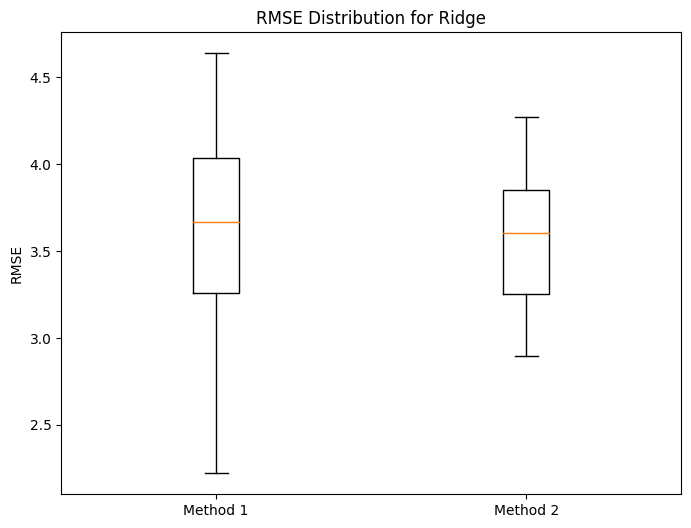

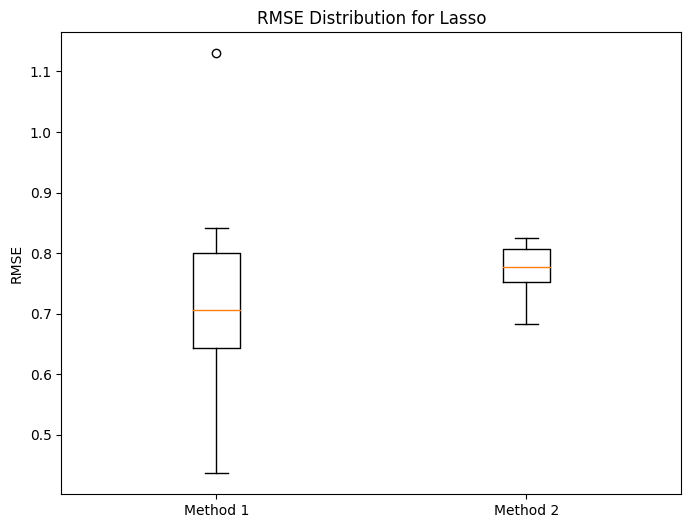

In [63]:
import matplotlib.pyplot as plt


# Extract RMSE values for Ridge and Lasso for Method 1 and Method 2

method1_ridge_rmse = [result[1] for result in method1_results['ridge']]
method1_lasso_rmse = [result[1] for result in method1_results['lasso']]
method2_ridge_rmse = [result[1] for result in method2_results['ridge']]
method2_lasso_rmse = [result[1] for result in method2_results['lasso']]
# Data to plot for Ridge
ridge_data = [method1_ridge_rmse, method2_ridge_rmse]
# Create the boxplot for Ridge
plt.figure(figsize=(8, 6))
plt.boxplot(ridge_data, labels=['Method 1', 'Method 2'])
plt.title('RMSE Distribution for Ridge')
plt.ylabel('RMSE')
plt.show()

lasso_data = [method1_lasso_rmse,method2_lasso_rmse]
plt.figure(figsize=(8, 6))
plt.boxplot(lasso_data, labels=['Method 1', 'Method 2'])
plt.title('RMSE Distribution for Lasso')
plt.ylabel('RMSE')
plt.show()

#plt.show()

In [36]:
##### YOUR CODE ENDS ##### (please do not delete this line)

#### <font color='purple'>(d) Comment on why the results look like they do? In general, when tuning parameters, is it better to use one training-validation split or K-fold cross-validation? Why?

**Answer:**

## Task 5. Regularization parameter effect on the coefficients  (1 point)

#### <font color='purple'>(a) The regularization parameter influences the values of the coefficients. Create two plots (one for Ridge and one for Lasso) that have the regularization parameter on the x-axis and coefficient values on the y-axis. You don't have to take all 99 values, you can take for example the first 20. Show each coefficient as a line (on the same plot) and comment on what happens when the regularization parameter increases. </font>

In [80]:
##### YOUR CODE STARTS ##### (please do not delete this line)


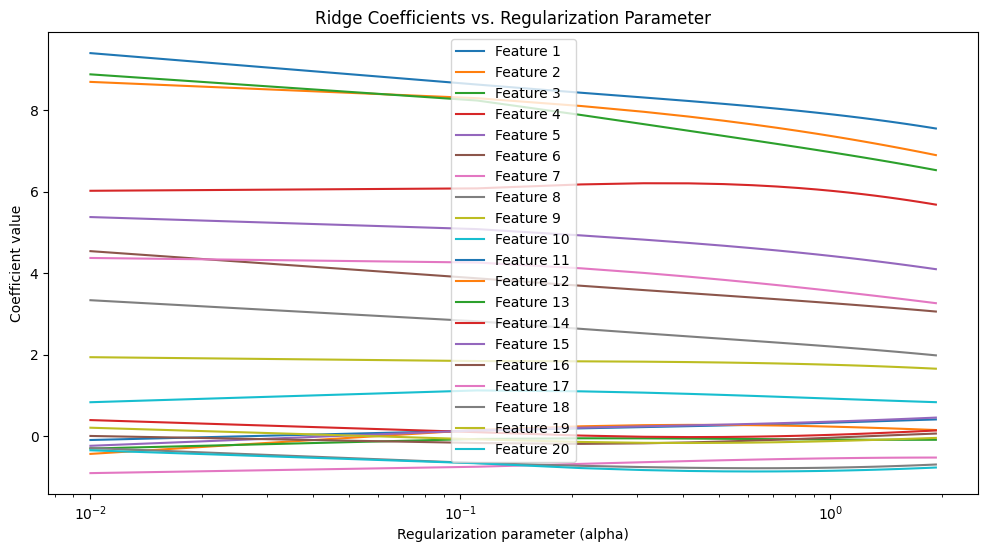

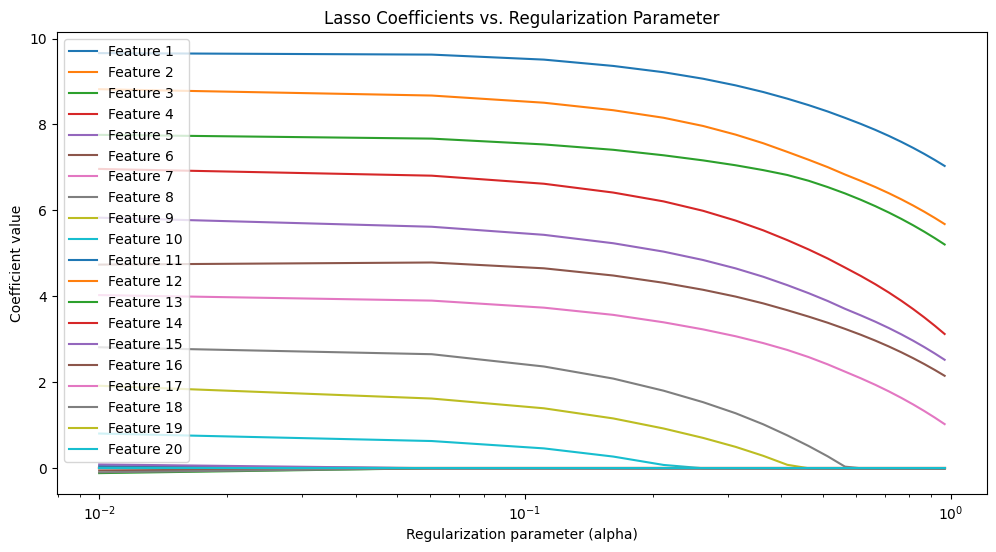

In [79]:
def plot_coefficients(alphas, coefs, title):
    plt.figure(figsize=(12, 6))
    for i in range(20):
        plt.plot(alphas, coefs[:, i], label=f'Feature {i+1}')
    plt.xscale('log')
    plt.xlabel('Regularization parameter (alpha)')
    plt.ylabel('Coefficient value')
    plt.title(title)
    plt.legend()
    plt.show()  
    
ridge_coefs = []
lasso_coefs = []
# Compute coefficients for Ridge
for alpha in alphas_ridge:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_coefs.append(ridge_model.coef_)

ridge_coefs = np.array(ridge_coefs)

# Compute coefficients for Lasso
for alpha in alphas_lasso:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_coefs.append(lasso_model.coef_)

lasso_coefs = np.array(lasso_coefs)

# Plot coefficients for Ridge
plot_coefficients(alphas_ridge[:20], ridge_coefs[:20], title='Ridge Coefficients vs. Regularization Parameter')

# Plot coefficients for Lasso
plot_coefficients(alphas_lasso[:20], lasso_coefs[:20], title='Lasso Coefficients vs. Regularization Parameter')    

In [38]:
##### YOUR CODE ENDS ##### (please do not delete this line)

#### <font color='purple'>(b) What does Ridge regression do and what does Lasso regression do? How do they differ? </font>

**Answer:**

## Task 6. Evaluating different models  (1 point)

#### <font color='purple'>(a) Choose the values of alpha for Ridge and Lasso according to subtask (4b). Now let's see which model works best for our data by evaluating the test RMSE. Compare the following models by reporting the training and testing set RMSE: </font>

1. Non-regularized linear regression
2. Ridge regression with your chosen parameter
3. Lasso regression with your chosen parameter
4. A "dumb" model that always predicts the mean value of y_train
5. An ideal model that the instructors have used for generating the data (the true coefficients are [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0, ..., 0] and intercept 0).

In [39]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [91]:

non_reg_pred_train = model.predict(X_train)
non_reg_pred_test = model.predict(X_test)
non_reg_rmse_train = np.sqrt(mean_squared_error(y_train, non_reg_pred_train))
non_reg_rmse_test = np.sqrt(mean_squared_error(y_test, non_reg_pred_test))

# 2. Ridge Regression
last_ridge_model = Ridge(alpha= 0.1109090909090909)
last_ridge_model.fit(X_train,y_train)
ridge_pred_train = last_ridge_model.predict(X_train)
ridge_pred_test = last_ridge_model.predict(X_test)
ridge_rmse_train = np.sqrt(mean_squared_error(y_train, ridge_pred_train))
ridge_rmse_test = np.sqrt(mean_squared_error(y_test, ridge_pred_test))

# 3. Lasso Regression

last_lasso_model = Lasso(alpha=0.01)    
last_lasso_model.fit(X_train,y_train)
lasso_pred_train = last_lasso_model.predict(X_train)
lasso_pred_test = last_lasso_model.predict(X_test)
lasso_rmse_train = np.sqrt(mean_squared_error(y_train, lasso_pred_train))
lasso_rmse_test = np.sqrt(mean_squared_error(y_test, lasso_pred_test))

#for the dumb model
dumb_prediction_train = np.mean(y_train) * np.ones_like(y_train)
dumb_prediction_test = np.mean(y_train) * np.ones_like(y_test)
dumb_rmse_train = np.sqrt(mean_squared_error(y_train, dumb_prediction_train))
dumb_rmse_test = np.sqrt(mean_squared_error(y_test, dumb_prediction_test))

# Calculate predictions for the ideal model
true_coefficients = np.array([10] + [9] + [8] + [7] + [6] + [5] + [4] + [3] + [2] + [1] + [0] * 89)  # Adjust the number of zeros based on your total features
ideal_pred_train = X_train.dot(true_coefficients)
ideal_pred_test = X_test.dot(true_coefficients)
ideal_rmse_train = np.sqrt(mean_squared_error(y_train, ideal_pred_train))
ideal_rmse_test = np.sqrt(mean_squared_error(y_test, ideal_pred_test))


print("RMSE for each model:")
print("Non-regularized Linear Regression:")
print("  Training RMSE:", non_reg_rmse_train)
print("  Testing RMSE:", non_reg_rmse_test)
print("\nRidge Regression:")
print("  Training RMSE:", ridge_rmse_train)
print("  Testing RMSE:", ridge_rmse_test)
print("\nLasso Regression:")
print("  Training RMSE:", lasso_rmse_train)
print("  Testing RMSE:", lasso_rmse_test)
print("\nDumb Model:")
print("  Training RMSE:", dumb_rmse_train)
print("  Testing RMSE:", dumb_rmse_test)
print("\nIdeal Model:")
print("  Training RMSE:", ideal_rmse_train)
print("  Testing RMSE:", ideal_rmse_test)


RMSE for each model:
Non-regularized Linear Regression:
  Training RMSE: 2.51279852074029e-14
  Testing RMSE: 7.715131133027525

Ridge Regression:
  Training RMSE: 0.1490975162448741
  Testing RMSE: 3.033253410713906

Lasso Regression:
  Training RMSE: 0.2866537792330122
  Testing RMSE: 0.8350416258831074

Dumb Model:
  Training RMSE: 11.047120424571311
  Testing RMSE: 11.321862747375917

Ideal Model:
  Training RMSE: 0.57494185801066
  Testing RMSE: 0.6006181029383401


In [40]:
##### YOUR CODE ENDS ##### (please do not delete this line)

#### <font color='purple'>(b) Which method gives the best results and by looking at which value do you claim that? Why did this method work the best in your opinion?

**Answer:**

#### <font color='purple'>(c) Were all of the "smart" models better than the "dumb" one (baseline). What would it mean if the learned model would give worse results?

**Answer:**

#### <font color='purple'>(d) Were the learned models far from the ideal one? Were the learned coefficients similar to the true ones?

**Answer:**

#### <font color='purple'>(e) Which model overfitted the most, how can you see that?

**Answer:**

#### <font color='purple'>(f) Are regularized methods always better than methods without regularization (not only in this case but in general). Why/why not?

**Answer:**

 ## <font color='red'>This was the last task! Please restart and run all before submission!</font>